In [1]:
from PIL import Image
from modules import VQA, Eval
from visprog.program_runner import ProgramRunner

/home/ahmadsa/anaconda3/envs/visprog/lib/python3.11/site-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/home/ahmadsa/anaconda3/envs/visprog/lib/python3.11/site-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


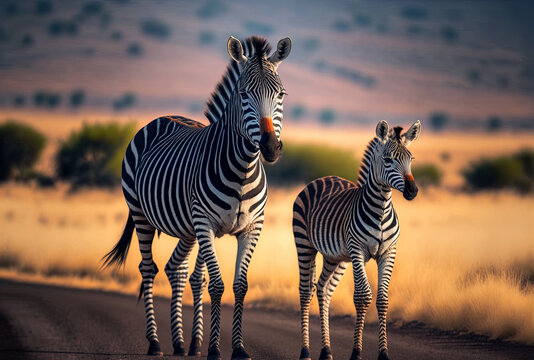

In [2]:
image1 = Image.open('assets/giraffes.jpeg').convert('RGB')
image1

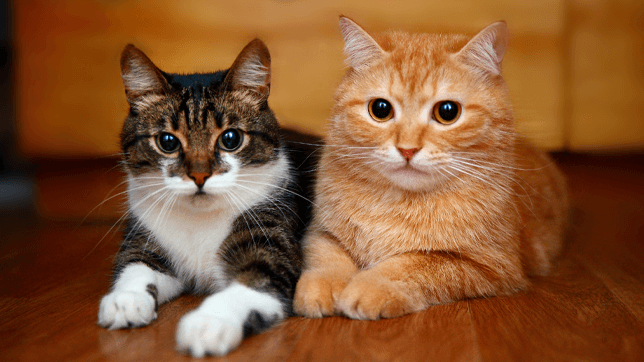

In [3]:
image2 = Image.open('assets/cats.webp').convert('RGB')
image2

In [6]:
vqa = VQA(device='cpu')

In [7]:
eval = Eval()

In [4]:
initial_state = {
    'IMAGE1': image1,
    'IMAGE2': image2
}

In [15]:
steps = [
    "ANSWER1=VQA(image=IMAGE1,question='How many animals are in the picture?')",
    "ANSWER2=VQA(image=IMAGE2,question='How many animals are in the picture?')",
    """ANSWER3=EVAL(expr="'yes' if {ANSWER1} == {ANSWER2} else 'no'")""",
    """ANSWER4=EVAL(expr="'yes' if int({ANSWER1}) + int({ANSWER2}) >= 6 else 'no'")""",
]

In [16]:
runner = ProgramRunner([vqa, eval])

In [17]:
_, result = runner.execute(steps, initial_state)

In [18]:
result.state

{'IMAGE1': <PIL.Image.Image image mode=RGB size=534x360>,
 'IMAGE2': <PIL.Image.Image image mode=RGB size=644x362>,
 'ANSWER1': '2',
 'ANSWER2': '2',
 'ANSWER3': 'yes',
 'ANSWER4': 'no'}

In [19]:
result.output

'no'

In [20]:
result.step_details

[{'input': <PIL.Image.Image image mode=RGB size=534x360>,
  'question': 'How many animals are in the picture?',
  'output': '2'},
 {'input': <PIL.Image.Image image mode=RGB size=644x362>,
  'question': 'How many animals are in the picture?',
  'output': '2'},
 {'expr': "'yes' if ANSWER1 == ANSWER2 else 'no'",
  'args': {'ANSWER1': '2', 'ANSWER2': '2'},
  'output': 'yes'},
 {'expr': "'yes' if int(ANSWER1) + int(ANSWER2) >= 6 else 'no'",
  'args': {'ANSWER1': '2', 'ANSWER2': '2'},
  'output': 'no'}]